In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
from wordcloud import WordCloud

# EDA

## 1º Estadística Descriptiva
Este análisis ayuda a describir las características básicas del dataset, brindando un resumen de los datos a través de:<br> _* Mediana_<br> _* 1º Quartil_<br>  * _3º Quartil_<br>  _* Mínimo_<br>  _* Máximo_

In [2]:
df_movies_ETL = pd.read_csv('movies_ETL.csv')

In [3]:
df_movies_ETL.describe(include='all')

,id,budget,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,vote_count,franquicia,géneros,productoras,países,doblajes,elenco,director,release_year,return
count,45451.000000,4.545100e+04,45440,44510,45451.000000,45451,4.545100e+04,45205.000000,45371,20425,...,45451.000000,4497,45451,45451,45451,45451,45451,44616,45451.000000,4.545100e+04
unique,NaN,NaN,89,44231,NaN,17333,NaN,NaN,6,20269,...,NaN,1695,4065,22668,2389,1843,42657,17549,NaN,NaN
top,NaN,NaN,en,No overview found.,NaN,2008-01-01,NaN,NaN,Released,Which one is the first to return - memory or t...,...,NaN,The Bowery Boys,['Drama'],[],['United States of America'],['English'],[],John Ford,NaN,NaN
freq,NaN,NaN,32249,133,NaN,136,NaN,NaN,45009,9,...,NaN,29,5006,11817,17868,22410,2354,66,NaN,NaN
mean,107984.599745,4.231294e+06,NaN,NaN,2.926887,NaN,1.121930e+07,94.181905,NaN,NaN,...,109.989703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991.882027,6.589542e+02
std,112111.336735,1.742942e+07,NaN,NaN,6.006458,NaN,6.433984e+07,38.329504,NaN,NaN,...,491.352336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.057726,7.463165e+04
min,2.000000,0.000000e+00,NaN,NaN,0.000000,NaN,0.000000e+00,0.000000,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1874.000000,0.000000e+00
25%,26367.500000,0.000000e+00,NaN,NaN,0.389095,NaN,0.000000e+00,85.000000,NaN,NaN,...,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978.000000,0.000000e+00
50%,59871.000000,0.000000e+00,NaN,NaN,1.131386,NaN,0.000000e+00,95.000000,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.000000,0.000000e+00
75%,156327.500000,0.000000e+00,NaN,NaN,3.694370,NaN,0.000000e+00,107.000000,NaN,NaN,...,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,0.000000e+00


En este primer vistazo se puede observar que el director **John Ford** es el que más películas ha dirigido, contabilizando un total de **66** películas.<br>También puede verse que el mayor número de películas están en idioma inglés (**en**), contabilizándose un total de **32249** pelícluas en ese idioma.<br>En cuanto a recaudación, el monto más alto es de **$ 2.787.965.000,00**.<br>El país con mayor cantidad de películas producidas es **Estados Unidos** (*United States of America*) con un total de **17.868** películas.<br>Por último, de las películas registradas en la base de datos, la más antigua fue estrenada en **1874** y la más nueva en **2020**

## 2º Análisis relacional de las Variables
Para el análisis de variables numéricas, pueden emplearse diferentes gráficas. Entre otras tenemos:<br>-_**Box Plot**_<br>-_**Gráficos de Barra**_<br>-_**Histogramas**_<br>-_**Gráficos de Dispersión**_

El primer análisis realizado, consistió en ver la cantidad de películas que fueron producidas en cada uno de los idiomas.<br> Para que el gráfico sea legible, se limitó el análisis a los 20 idiomas con mayor cantidad de películas.


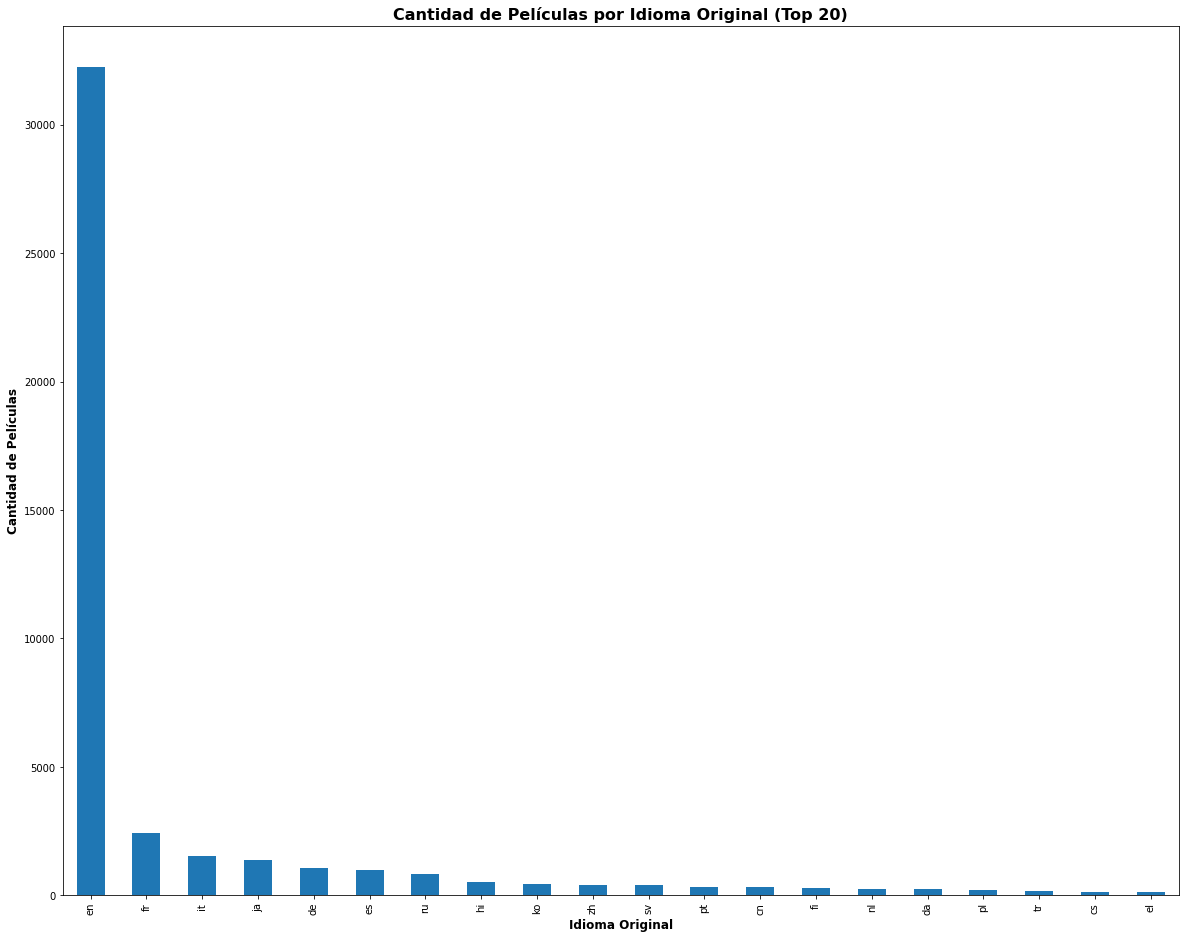

In [4]:
# Obtener el listado de la cantidad de películas por idioma original

peliculas_por_idioma = df_movies_ETL['original_language'].value_counts().head(20)
    
# Configurar el gráfico de barras
plt.figure(figsize=(20, 16))
peliculas_por_idioma.plot(kind='bar')
    
# Personalizar el gráfico
plt.title('Cantidad de Películas por Idioma Original (Top 20)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Idioma Original', fontsize = 12, fontweight = 'bold')
plt.ylabel('Cantidad de Películas', fontsize = 12, fontweight = 'bold')
    
# Mostrar el gráfico
plt.show()

Se ve como las películas producidas en idioma inglés (**en**) como idioma original, son la inmensa mayoría de las películas contenidas en data set provisto.<br> Por esta razón, muchos de los análisis que se realizan posteriormente, se centran solamente en este subgrupo de películas que tienen como idioma original el idioma inglés.

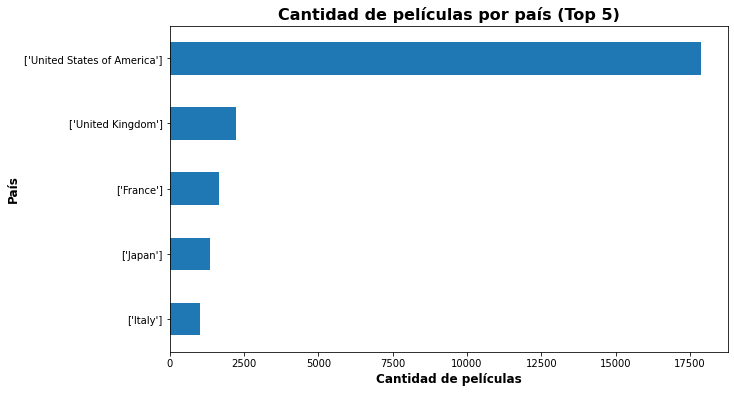

In [5]:
# Paso 1: Filtrar el DataFrame para excluir el campo vacío '[]' en la columna de países
filtered_data = df_movies_ETL[df_movies_ETL['países'] != '[]']

# Paso 2: Obtener los cinco países con más películas después de excluir el campo vacío
top_countries = filtered_data['países'].value_counts().head(5).index

# Paso 3: Filtrar nuevamente el DataFrame para incluir solo los países seleccionados
filtered_data = filtered_data[filtered_data['países'].isin(top_countries)]

# Paso 4: Agrupar los datos por país y contar la cantidad de películas
grouped_data = filtered_data.groupby('países')['title'].count().sort_values(ascending=True)

# Paso 5: Generar el gráfico de barras horizontales
grouped_data.plot.barh(figsize=(10, 6))
plt.xlabel('Cantidad de películas', fontsize = 12, fontweight = 'bold')
plt.ylabel('País', fontsize = 12, fontweight = 'bold')
plt.title('Cantidad de películas por país (Top 5)', fontsize = 16, fontweight = 'bold')
plt.show()

Para realización de esta gráfica, se dejaron de lado los registros que no contaban con información del país en donde habían sido producidas.
Puede verse claramente que la gran mayoría de las películas fueron producidas por Estados Unidos, lo cual coincide con lo encontrado en la gráfica anterior respecto al idioma original de las películas.

In [97]:
# Paso 1: Filtrar el DataFrame para seleccionar las películas en idioma inglés.
df_filtered = df_movies_ETL[(df_movies_ETL['original_language'] == 'en')]
# Paso 2: Agrupar los datos filtrados por la columna 'franquicia' y calcular la cantidad de películas y el total recaudado para cada franquicia:
grouped_data = df_filtered.groupby('franquicia').agg({'title': 'count', 'revenue': 'sum'})

Para empezar a analizar la información contenida en el DataFrame, realicé un filtrado por idioma (generando un subgrupo con las películas en idioma inglés), y luego una agrupación por el nombre de la franquicia a la que pertecen las películas, para así realizar el cálculo de la recaudación total para cada franquicia.

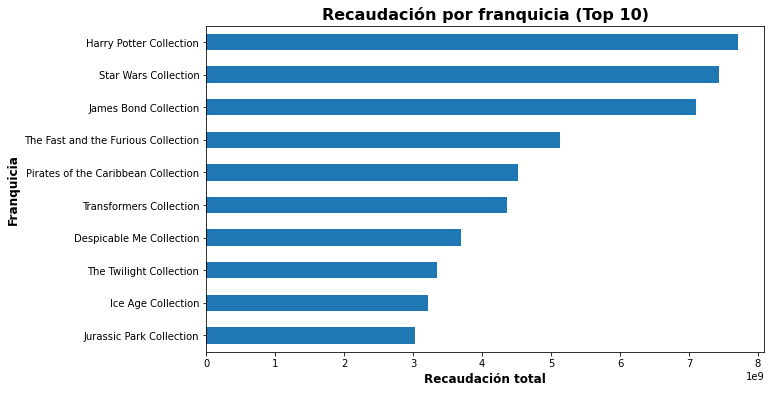

In [100]:
# Gráfico de recaudación por franquicia (top 10):

top_revenue = grouped_data.nlargest(10, 'revenue')[::-1]
# Ordenar los datos por recaudación de forma descendente
# top_revenue = grouped_data.sort_values('revenue', ascending=False).nlargest(10, 'revenue')[::-1]
top_revenue['revenue'].plot.barh(figsize=(10, 6))
plt.xlabel('Recaudación total', fontsize = 12, fontweight = 'bold')
plt.ylabel('Franquicia', fontsize = 12, fontweight = 'bold')
plt.title('Recaudación por franquicia (Top 10)', fontsize = 16, fontweight = 'bold')
plt.show()




La franquicia con el record de recaudación es **Harry Potter Collection**, en segundo lugar se encuentra la franquicia **Star Wars Collection** y el tercer lugar lo ocupa la franquicia **James Bond Collection**. La gráfica muestra las siete franquicias que siguen dentro del Top 10. Cabe aclarar que todas las películas tenidas en cuenta en este análisis fueron realizadas en idioma inglés (en)

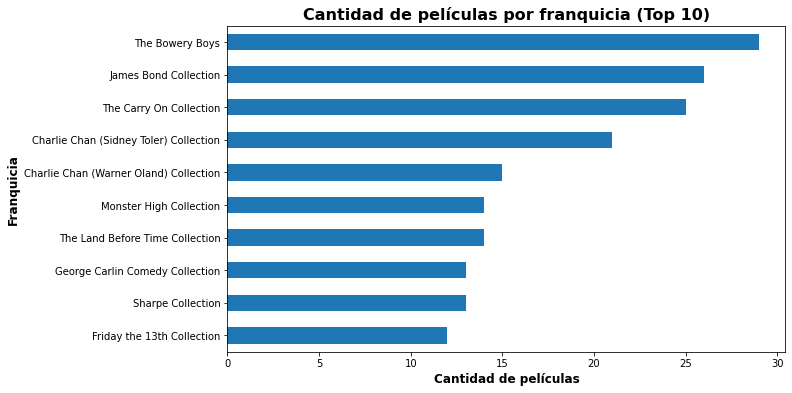

In [99]:
# Gráfico de cantidad de películas por franquicia (top 10):

top_movies = grouped_data.nlargest(10, 'title')[::-1]
top_movies['title'].plot.barh(figsize=(10, 6))
plt.xlabel('Cantidad de películas', fontsize = 12, fontweight = 'bold')
plt.ylabel('Franquicia', fontsize = 12, fontweight = 'bold')
plt.title('Cantidad de películas por franquicia (Top 10)', fontsize = 16, fontweight = 'bold')
plt.show()

Esta gráfica de barras muestra el Top 10 con las franquicias con mayor cantidad de películas producidas.<br> Comparando con el gráfico de barras anterior (_Recaudación por franquicia_) se ve que sólo la franquicia **James Bond Collection** ocupa un lugar en ambos Top 10.

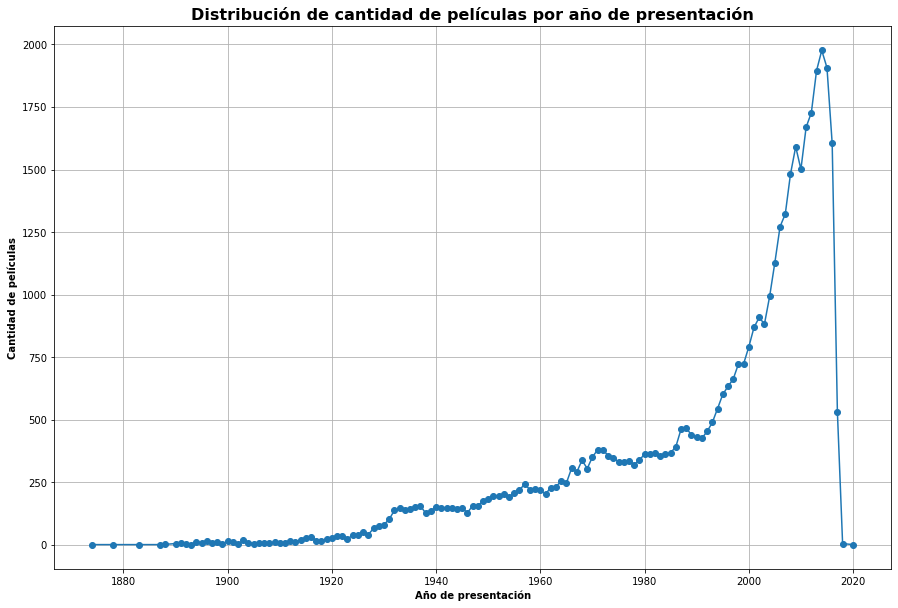

In [13]:
# Obtener los datos de cantidad de películas por año de presentación
data = df_movies_ETL['release_year'].value_counts().sort_index()

# Crear el gráfico de líneas
plt.figure(figsize=(15, 10))
plt.grid()
plt.plot(data.index, data.values, marker='o', linestyle='-')

# Personalizar el gráfico
plt.xlabel('Año de presentación', fontweight = 'bold')
plt.ylabel('Cantidad de películas', fontweight = 'bold')
plt.title('Distribución de cantidad de películas por año de presentación', fontsize = 16, fontweight = 'bold')

# Mostrar el gráfico
plt.show()

Al analizar la cantidad de películas considerando el año de presentación de la misma, se observa que hay un claro crecimiento a partir de la década de **1920**, con un crecimiento casi lineal desde **1920** hasta **1990**, para luego cambiar a un crecimiento casi exponencial.<br> La información provista no cuenta con muchos registros en los últimos años próximos al **2020**.

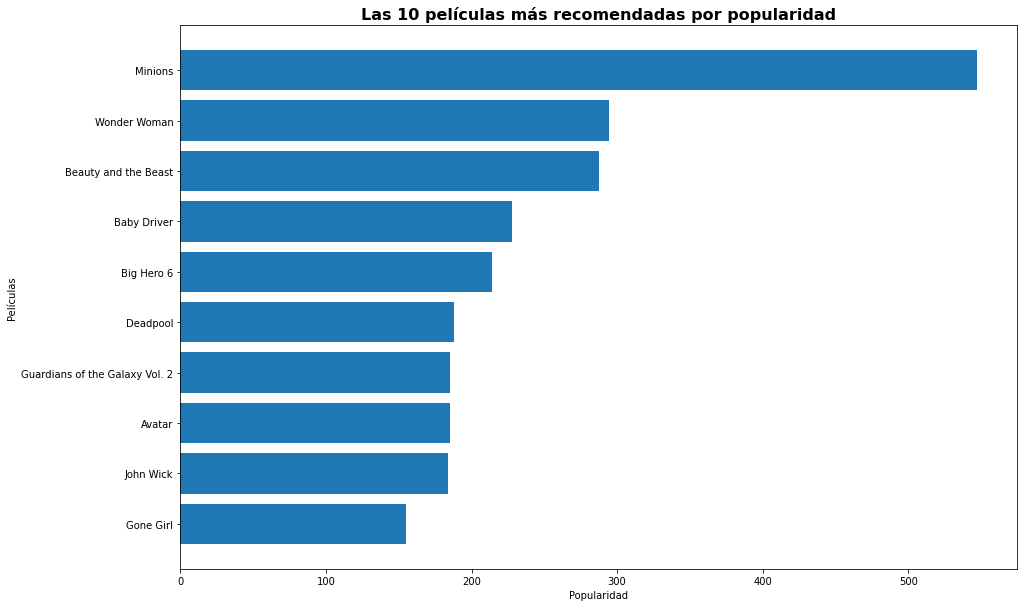

In [14]:
# Ordenar el DataFrame por 'popularity' de manera descendente
df_sorted = df_movies_ETL.sort_values('popularity', ascending=False)

# Seleccionar las 10 primeras filas
top_10_movies = df_sorted.head(10)

# Revertir el orden de las filas para que aparezcan de mayor a menor
top_10_movies = top_10_movies.iloc[::-1]

# Crear el gráfico de barras horizontales
plt.figure(figsize=(15, 10))
plt.barh(top_10_movies['title'], top_10_movies['popularity'])

# Personalizar el gráfico
plt.xlabel('Popularidad')
plt.ylabel('Películas')
plt.title('Las 10 películas más recomendadas por popularidad', fontsize = 16, fontweight = 'bold')

# Mostrar el gráfico
plt.show()



Con respecto al índice de popularidad (campo `popularity`), se lleva el primer puesto la película **Minions**, con un puntaje que casi duplica a la película ubicada en segundo lugar (**Wonder Woman**).<br>
Dado que este índice se empleará para poder armar el sistema de recomendación, será importante ponderarlo adecuadamente para que no sesge el resultado de la misma.

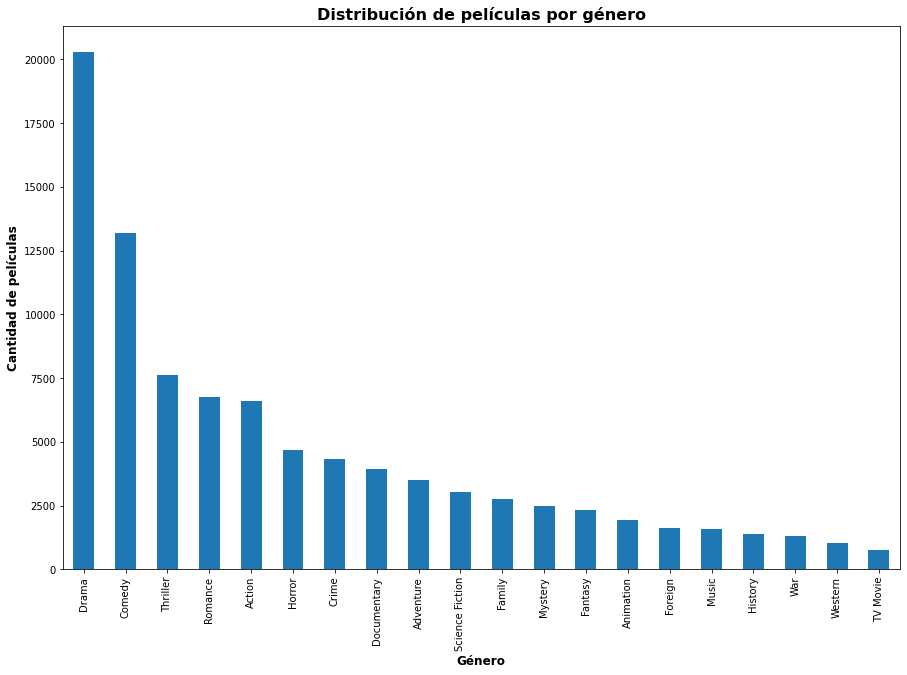

In [15]:
# Distribución de películas por género, teniendo en cuenta únicamente los géneros asignados y excluyendo aquellos que tienen una celda vacía.

# Filtrar el DataFrame para eliminar las filas con género no asignado (celda vacía)
df_filtered = df_movies_ETL[df_movies_ETL['géneros'].notnull()]

# Crear una nueva columna 'genre' que contenga cada género individual de forma separada
df_filtered['géneros'] = df_filtered['géneros'].apply(lambda géneros: eval(géneros))
df_filtered = df_filtered.explode('géneros')

# Calcular la cantidad de películas por género
genre_counts = df_filtered['géneros'].value_counts()

# Ordenar los géneros por cantidad de películas de mayor a menor
genre_counts = genre_counts.sort_values(ascending=False)

# Graficar la distribución de películas por género
genre_counts.plot(kind='bar', figsize=(15, 10))
plt.xlabel('Género', fontsize = 12, fontweight = 'bold')
plt.ylabel('Cantidad de películas', fontsize = 12, fontweight = 'bold')
plt.title('Distribución de películas por género',fontsize = 16, fontweight = 'bold')

# Inclinar los labels del eje x
#plt.xticks(rotation=30)
plt.show()


Analizando la cantidad de películas agrupadas por género, el género **Drama** cuenta con más de 20.000 películas, siendo este género el que ocupa el primer lugar.<br>
Para realizar este análisis, se desagregó el atributo `géneros` para poder evaluar indivualmente cada género.

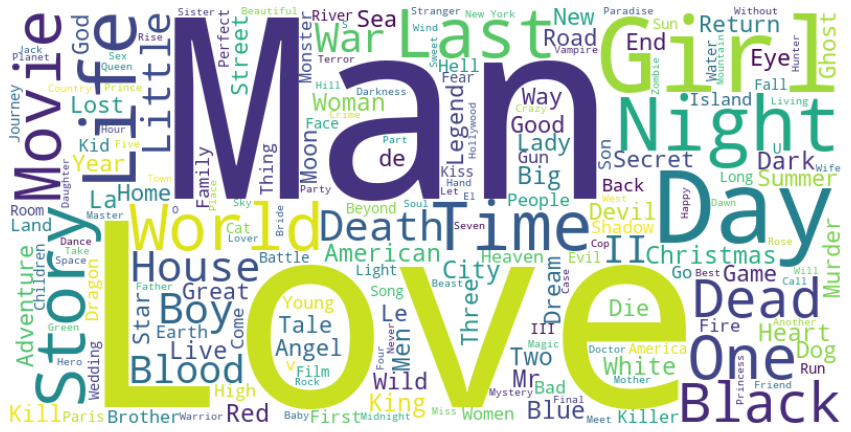

In [18]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenar los títulos de las películas en un solo texto
text = ' '.join(df_movies_ETL['title'])

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras utilizando Matplotlib
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Se realizó también una **Nube de Palabras** para tener una idea de la frecuencia de aparición de las palabras de los títulos de las películas. Esta información puede ser de utilidad a la hora de definir un criterio de similitud entre películas para realizar una recomendación.<br>
Del gráfico se desprende que las palabras **Love** y **Man** son las que más aparecen en los títulos de las películas del data set provisto.

## Correlaciones

Para poder ver el grado de dependencia o no entre determinados parámetros del data set, se recurrió al uso de la matriz de correlación.

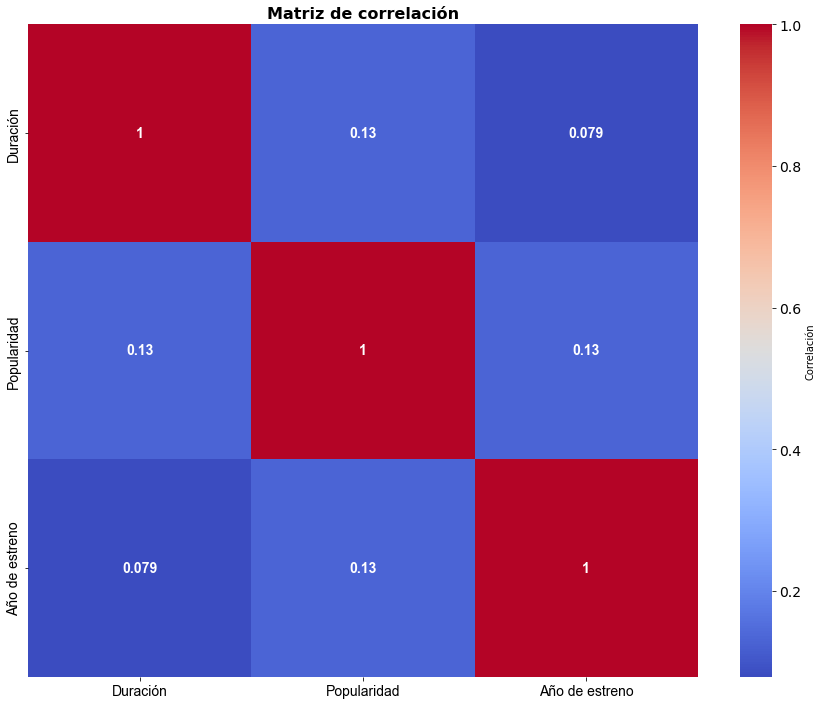

In [7]:
# Seleccionar las columnas relevantes
selected_columns = ['runtime', 'popularity', 'release_year']
df_selected = df_movies_ETL[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = df_selected.corr()

# Modificar el tamaño y tipo de letra en la matriz de correlación
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
                      annot_kws={'fontsize': 14, 'fontname': 'Arial', 'fontweight': 'bold'},
                      xticklabels=['Duración', 'Popularidad', 'Año de estreno'],
                      yticklabels=['Duración', 'Popularidad', 'Año de estreno'],
                      cbar_kws={'label': 'Correlación'})

# Cambiar el tamaño y tipo de letra en los ejes x e y
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14, fontname='Arial')
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14, fontname='Arial')

# Cambiar el tamaño y tipo de letra en la barra de color
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)

plt.title('Matriz de correlación', fontsize=16, fontweight='bold')
plt.show()

Los parámetros analizados en esta matriz, muestra que los mismos son independientes entre sí, presentado valores de correlación ente ellos muy bajos.

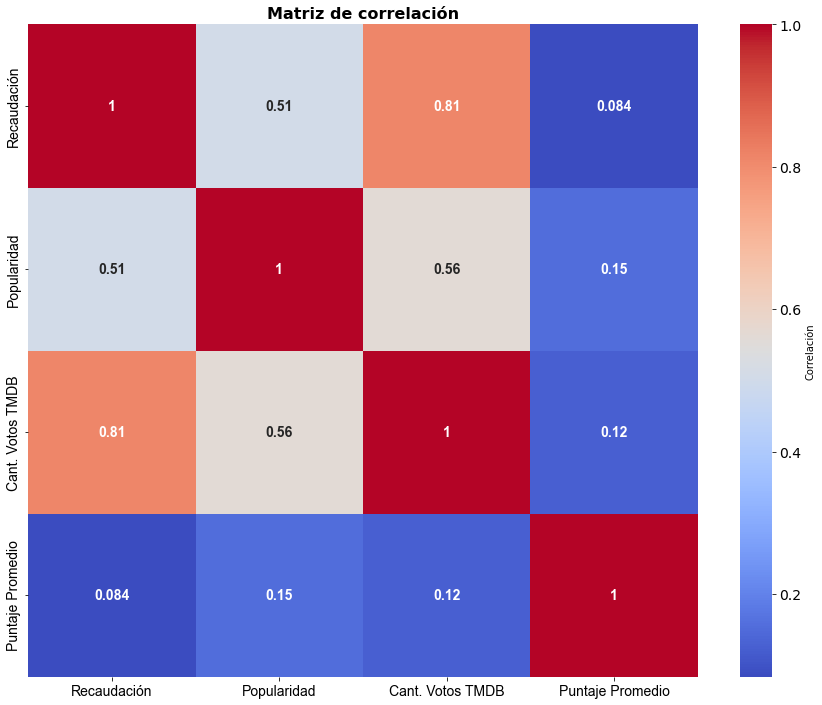

In [20]:
# Seleccionar las columnas relevantes
selected_columns = ['revenue', 'popularity', 'vote_count', 'vote_average']
df_selected = df_movies_ETL[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = df_selected.corr()

# Modificar el tamaño y tipo de letra en la matriz de correlación
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
                      annot_kws={'fontsize': 14, 'fontname': 'Arial', 'fontweight': 'bold'},
                      xticklabels=['Recaudación', 'Popularidad', 'Cant. Votos TMDB', 'Puntaje Promedio'],
                      yticklabels=['Recaudación', 'Popularidad', 'Cant. Votos TMDB', 'Puntaje Promedio'],
                      cbar_kws={'label': 'Correlación'})

# Cambiar el tamaño y tipo de letra en los ejes x e y
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14, fontname='Arial')
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14, fontname='Arial')

# Cambiar el tamaño y tipo de letra en la barra de color
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)

plt.title('Matriz de correlación', fontsize=16, fontweight='bold')
plt.show()

En esta segunda matríz de correlación se buscó analizar la posible dependencia entre los paráamtros _Recaudación_ (revenue), _Popularidad_ (popularity), la _Cant. Votos TMDB_ (vote_count) y el _Puntaje Promedio_(vote_average) de esas votaciones.<br> Acá sí puede observarse un gran correlación (**0.81**) entre el parámetro _Recaudación_ y la cantidad de votos.

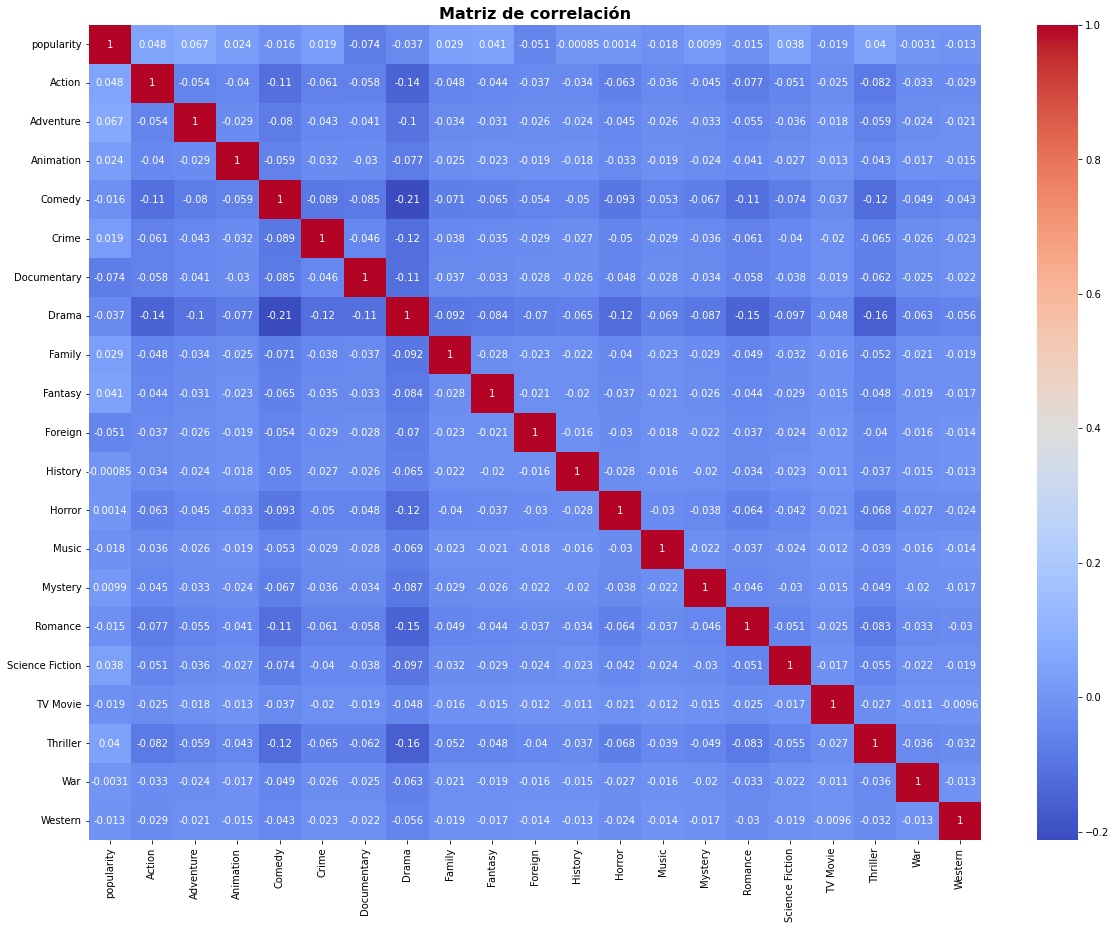

In [6]:
# Seleccionar las variables relevantes
selected_columns = ['popularity', 'géneros', 'franquicia']
df_selected = df_movies_ETL[selected_columns]

# Preprocesamiento de datos
# df_selected['géneros'] = df_selected['géneros'].apply(eval)
df_selected.loc[:, 'géneros'] = df_selected['géneros'].apply(eval)

df_selected = df_selected.explode('géneros')

# Codificar la columna "géneros" en variables numéricas
df_encoded = pd.get_dummies(df_selected['géneros']) #, prefix='género')

# Calcular la matriz de correlación considerando solo las variables numéricas
correlation_matrix = pd.concat([df_selected['popularity'], df_encoded], axis=1).corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación', fontsize = 16, fontweight = 'bold')
plt.show()


Por último, quise ver si había aguna relación entre la puntuación de popularidad y los géneros de las películas. La matriz obtenida muestra que no hay relación específica entre algún género en particular y la polpularidad de las películas.

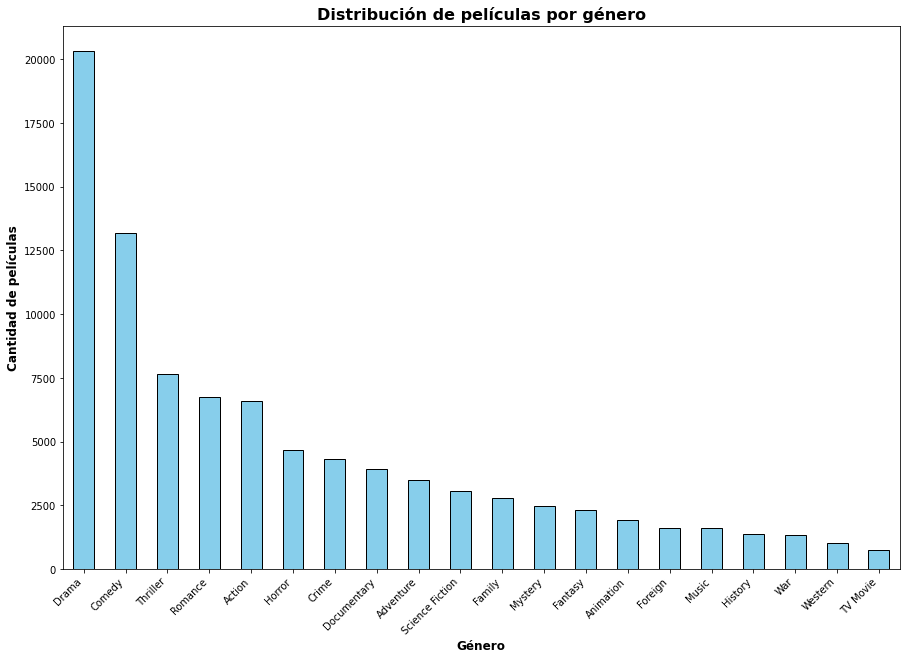

In [7]:
# Filtrar el DataFrame para eliminar las filas con género no asignado (celda vacía)
df_filtered = df_movies_ETL[df_movies_ETL['géneros'].notnull()]

# Crear una nueva columna 'genre' que contenga cada género individual de forma separada
df_filtered['géneros'] = df_filtered['géneros'].apply(lambda géneros: eval(géneros))
df_filtered = df_filtered.explode('géneros')

# Calcular la cantidad de películas por género
genre_counts = df_filtered['géneros'].value_counts()

# Ordenar los géneros por cantidad de películas de mayor a menor
genre_counts = genre_counts.sort_values(ascending=False)

# Graficar la distribución de películas por género
plt.figure(figsize=(15, 10))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizar los ejes y etiquetas
plt.xlabel('Género', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de películas', fontsize=12, fontweight='bold')
plt.title('Distribución de películas por género', fontsize=16, fontweight='bold')

# Establecer las etiquetas de los géneros en el eje x
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico de barras
plt.show()

Al ver la distribución de la cantidad de películas para cada género individual, la mayor cantidad de películas pertenecen al género *Drama*, seguida por el género *Comedy*.

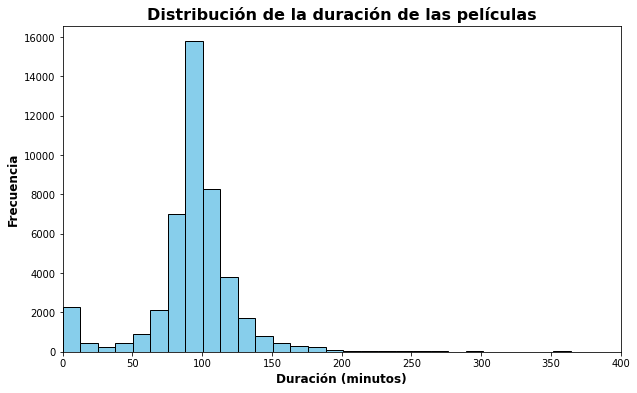

In [10]:
# Filtrar el DataFrame para eliminar las filas con duración no asignada (celda vacía)
df_filtered = df_movies_ETL[df_movies_ETL['runtime'].notnull()]

# Crear el histograma de la distribución de la duración de las películas
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['runtime'], bins=100, color='skyblue', edgecolor='black')

# Personalizar los ejes y etiquetas
plt.xlabel('Duración (minutos)', fontsize=12, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12, fontweight='bold')
plt.title('Distribución de la duración de las películas', fontsize=16, fontweight='bold')
# Limitar el eje x hasta 100
plt.xlim(0, 400)
# Mostrar el histograma
plt.show()


En este código, se filtra el DataFrame df_movies_ETL para eliminar las filas con duración no asignada (celdas vacías). Luego, se crea el histograma utilizando la columna 'duration' del DataFrame. Se especifica el número de bins (100 en este ejemplo) para dividir los datos en intervalos y se personalizan los ejes y etiquetas del gráfico. Finalmente, se muestra el histograma.

El resultado es un gráfico de barras que muestra la distribución de la duración de las películas, donde el eje x representa los intervalos de duración y el eje y muestra la frecuencia de películas en cada intervalo. Esto permite visualizar que la duración de las películas tiende a concentrarse en el rango de 75 a 125 minutos, teniendo el pico el intervalo [87.5 - 100].

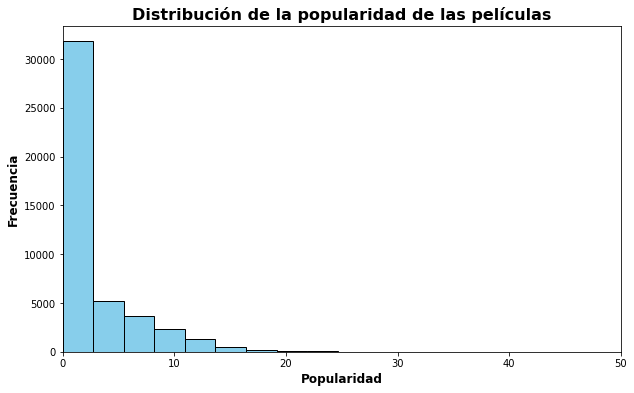

In [134]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para eliminar las filas con popularidad no asignada (celda vacía)
df_filtered = df_movies_ETL[df_movies_ETL['popularity'].notnull()]

# Crear el histograma de la distribución de la popularidad de las películas
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['popularity'], bins=200, color='skyblue', edgecolor='black')

# Personalizar los ejes y etiquetas
plt.xlabel('Popularidad', fontsize=12, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12, fontweight='bold')
plt.title('Distribución de la popularidad de las películas', fontsize=16, fontweight='bold')

# Limitar el eje x hasta 100
plt.xlim(0, 50)

# Mostrar el histograma
plt.show()

El resultado será un gráfico de barras que muestra la distribución de la popularidad de las películas, donde el eje x representa los intervalos de popularidad y el eje y muestra la frecuencia de películas en cada intervalo. Esto permite visualizar cómo se distribuyen las películas en términos de su nivel de popularidad.<br> Se aprecia que hay un gran número de películas con baja popularidad, y muy pocas para los valores altos de popularidad.

### Distribución de Recaudación

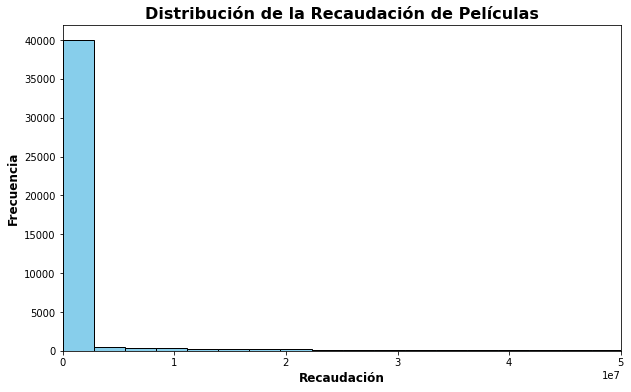

In [8]:
# Filtrar las películas que tienen información de recaudación
df_revenue = df_movies_ETL[df_movies_ETL['revenue'].notnull()]

# Crear el histograma de la distribución de la recaudación
plt.figure(figsize=(10, 6))
plt.hist(df_revenue['revenue'], bins=1000, color='skyblue', edgecolor='black')

# Personalizar los ejes y etiquetas
plt.xlabel('Recaudación', fontsize=12, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12, fontweight='bold')
plt.title('Distribución de la Recaudación de Películas', fontsize=16, fontweight='bold')

# Establecer límites en el eje x
plt.xlim(0, 50000000)  # Puedes ajustar los límites según tus necesidades

# Mostrar el histograma
plt.show()

Este script filtra las películas que tienen información de recaudación no nula y crea un histograma que muestra la distribución de la recaudación. Se observa que la mayoría de las películas (aproximadamente unas **4.000**) tuvieron una recaudación similar, de alrededor de unos 0.25 x 10^7 (2.500.000). Muy pocas películas presentan montos de recaudación superiore a este valor.

A partir de la gráfica puede observarse que hay pocas películas con alta puntuación, y que la mayoría de las películas recibieron una puntuación intermedia, levemente superior al valor medio (5 puntos). El cuartil de mayor puntaje

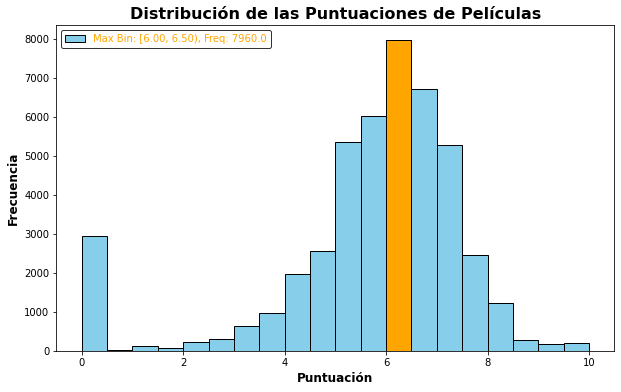

In [46]:
# Filtrar las películas que tienen información de puntuación
df_ratings = df_movies_ETL[df_movies_ETL['vote_average'].notnull()]

# Crear el histograma de la distribución de las puntuaciones
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df_ratings['vote_average'], bins=20, color='skyblue', edgecolor='black')

# Obtener el índice del bin con la frecuencia máxima
max_bin_index = np.argmax(hist)

# Obtener el valor del bin de mayor puntuación
max_bin_value = bins[max_bin_index]

# Obtener los límites del bin de mayor puntuación
max_bin_start = bins[max_bin_index]
max_bin_end = bins[max_bin_index + 1]

# Graficar el bin de mayor puntuación con otro color
max_bin_freq = hist[max_bin_index]
plt.bar((max_bin_start + max_bin_end) / 2, max_bin_freq, color='orange', width=max_bin_end - max_bin_start, edgecolor = 'black')
# Personalizar los ejes y etiquetas
plt.xlabel('Puntuación', fontsize=12, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12, fontweight='bold')
plt.title('Distribución de las Puntuaciones de Películas', fontsize=16, fontweight='bold')

# Agregar la leyenda del bin de mayor puntuación
legend_text = f'Max Bin: [{max_bin_start:.2f}, {max_bin_end:.2f}), Freq: {hist[max_bin_index]}'
plt.legend([legend_text], facecolor='white', edgecolor='black', labelcolor='orange')

# Mostrar el histograma
plt.show()


Al estudiar cómo se distribuye la puntuación asignada por la votación TMDB, se ve que bin con mayor frecuencia corresponde a una puntuación de **6**. También se aprecian un valor importante sin puntuación (3000 películas para el bin 0)

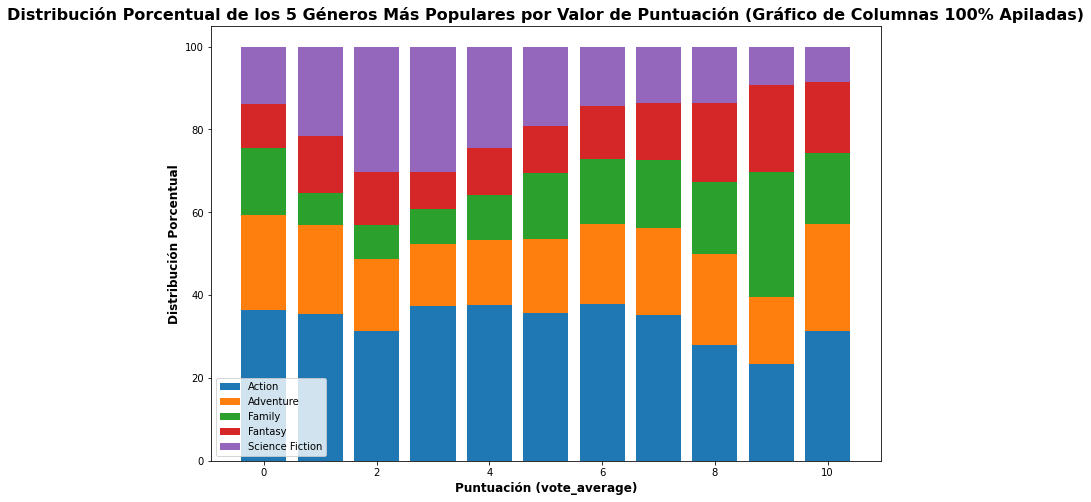

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filtrar el DataFrame para eliminar las filas con género no asignado y valores faltantes en popularidad y puntuación
df_filtered = df_movies_ETL[df_movies_ETL['géneros'].notnull() & df_movies_ETL['popularity'].notnull() & df_movies_ETL['vote_average'].notnull()]

# Crear una nueva columna 'géneros' que contenga cada género individual de forma separada
df_filtered['géneros'] = df_filtered['géneros'].apply(lambda géneros: eval(géneros))
df_filtered = df_filtered.explode('géneros')

# Seleccionar los 5 géneros más populares en general
top_genres = df_filtered.groupby('géneros')['popularity'].mean().nlargest(5).index

# Redondear la puntuación (vote_average) al valor entero más cercano
df_filtered['rounded_vote_average'] = np.round(df_filtered['vote_average'])

# Calcular la distribución porcentual de los géneros más populares para cada valor de puntuación redondeado
genre_vote_average_percentages = df_filtered[df_filtered['géneros'].isin(top_genres)].groupby(['rounded_vote_average', 'géneros'])['popularity'].count().reset_index(name='count')
genre_vote_average_percentages['percentage'] = genre_vote_average_percentages.groupby('rounded_vote_average')['count'].transform(lambda x: x / x.sum() * 100)

# Obtener los valores únicos de puntuación y géneros redondeados
unique_vote_average = genre_vote_average_percentages['rounded_vote_average'].unique()
unique_genres = genre_vote_average_percentages['géneros'].unique()

# Crear una matriz para almacenar las frecuencias por género y puntuación
frequency_matrix = np.zeros((len(unique_vote_average), len(unique_genres)))

# Llenar la matriz de frecuencias con los valores correspondientes
for index, row in genre_vote_average_percentages.iterrows():
    vote_average_index = np.where(unique_vote_average == row['rounded_vote_average'])[0][0]
    genre_index = np.where(unique_genres == row['géneros'])[0][0]
    frequency_matrix[vote_average_index, genre_index] = row['percentage']

# Crear el gráfico de columnas 100% apiladas
fig, ax = plt.subplots(figsize=(12, 8))

# Generar las columnas apiladas
bottoms = np.zeros(len(unique_vote_average))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i in range(len(unique_genres)):
    ax.bar(unique_vote_average, frequency_matrix[:, i], bottom=bottoms, label=unique_genres[i], color=colors[i])
    bottoms += frequency_matrix[:, i]

# Personalizar los ejes y etiquetas
ax.set_xlabel('Puntuación (vote_average)', fontsize=12, fontweight='bold')
ax.set_ylabel('Distribución Porcentual', fontsize=12, fontweight='bold')
ax.set_title('Distribución Porcentual de los 5 Géneros Más Populares por Valor de Puntuación (Gráfico de Columnas 100% Apiladas)', fontsize=16, fontweight='bold')
ax.legend()

# Mostrar el gráfico de columnas 100% apiladas
plt.show()


Para completar el análisis del puntaje vinculado a las votaciones TMDB, se generó un gráfico de barras 100% apiladas, para ver la distribución de los 5 géneros con mayor cantidad de valores de votos asignados en cada valor.<br>Se aprecia que para casi todas las votaciones registradas, la mayor cantidad de votos se corresponden a películas del género **Action**, mientras que el 2º lugar varía el género según sea el valor del voto.

A partir de los análisis realizados, se buscará implementar un sistema de recomendación de películas que utilice múltiples características de las películas para calcular una puntuación de similitud y generar una lista de recomendaciones basadas en esa similitud.<br>Las características que se emplearán son: géneros, franquicia, popularidad, título y elenco.